#### Pakker

In [129]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

#Setter en stil på de forskjellige grafiske fremstillingen som skal brukes.
plt.style.use("bmh")

#### Data innsamling

In [130]:
#Parametere
start = '2022-01-01' 
end = date.today()
#datetime pakken muliggjør dynamikk i koden
ticker = 'MSFT'

df = yf.download(ticker,start,end)[['Volume', 'Adj Close']]
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Volume,Adj Close
Date,,
2024-03-06,22344100,402.089996
2024-03-07,18718500,409.140015
2024-03-08,17971700,406.220001
2024-03-11,16120800,404.519989
2024-03-12,22457000,415.279999
2024-03-13,17115900,415.100006
2024-03-14,34157300,425.220001
2024-03-15,45049800,416.420013
2024-03-18,20106000,417.320007


Text(0, 0.5, 'Adjusted Close')

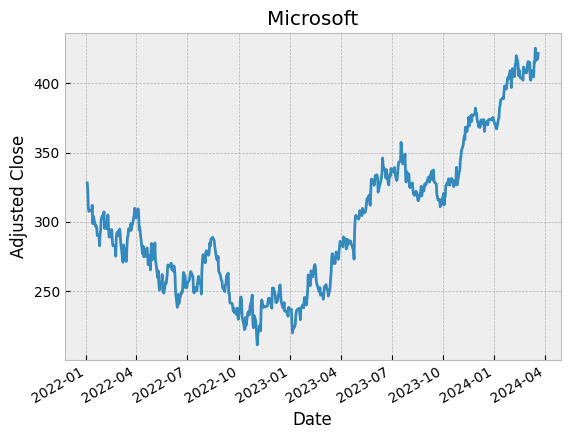

In [131]:
#Plotter den justerte sluttkursen over tid
ax = df['Adj Close'].plot()
ax.set_title('Microsoft')
ax.set_ylabel('Adjusted Close')

Text(0, 0.5, 'Volume')

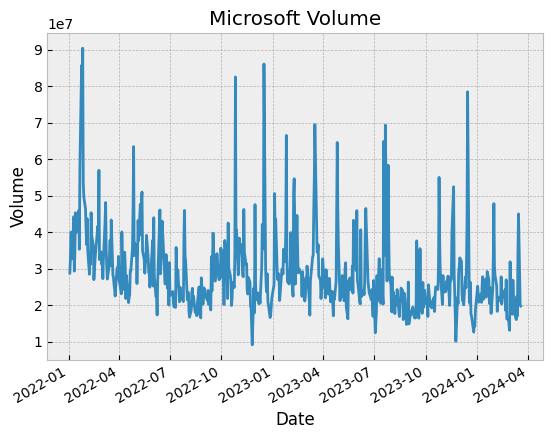

In [132]:
#Plotter volum over tid, NB: Formatering av y-akse
ax = df.Volume.plot()
ax.set_title('Microsoft Volume')
ax.set_ylabel('Volume')

In [133]:
#Info DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555 entries, 2022-01-03 to 2024-03-19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Volume     555 non-null    int64  
 1   Adj Close  555 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.0 KB


In [134]:
#Beskrivende statistikk
round(df.describe())

,Volume,Adj Close
count,555.0,555.0
mean,28871524.0,299.0
std,10972134.0,52.0
min,9200800.0,211.0
25%,21743500.0,255.0
50%,26541100.0,289.0
75%,32778700.0,331.0
max,90428900.0,425.0


#### Trend

In [135]:
#Parameter
dager = [10,20,50]

for dag in dager:
    ma_dag = f'MA{dag}'
    df[ma_dag] = df['Adj Close'].rolling(dag).mean()


/tmp/ipykernel_1407/2987907410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ma_dag] = df['Adj Close'].rolling(dag).mean()
/tmp/ipykernel_1407/2987907410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ma_dag] = df['Adj Close'].rolling(dag).mean()
/tmp/ipykernel_1407/2987907410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [136]:
df.tail(5)

,Volume,Adj Close,MA10,MA20,MA50
Date,,,,,
2024-03-13,17115900,415.100006,409.906003,408.443501,400.436618
2024-03-14,34157300,425.220001,411.064001,409.230002,401.537310
2024-03-15,45049800,416.420013,411.156003,409.723003,402.467391
2024-03-18,20106000,417.320007,411.396002,410.386003,403.468575
2024-03-19,19824100,421.410004,413.272003,411.317003,404.555351


Text(0, 0.5, 'Adjusted Close')

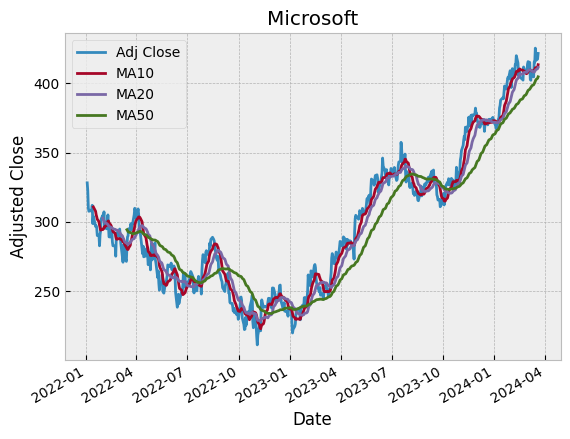

In [137]:
#Plotter trend
ax = df[['Adj Close', 'MA10', 'MA20', 'MA50']].plot()
ax.set_title('Microsoft')
ax.set_ylabel('Adjusted Close')

Text(0, 0.5, 'Adjusted Close')

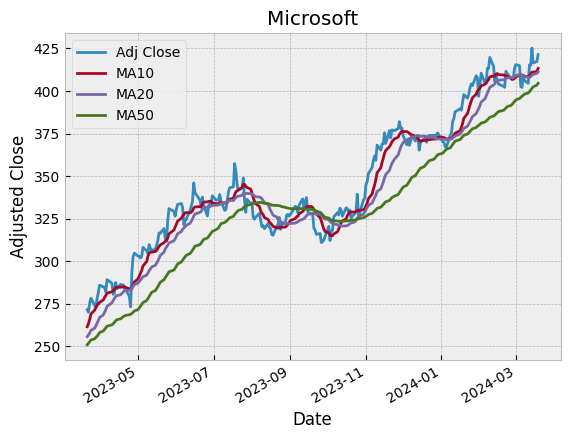

In [138]:
#Trend de siste 365 dagene
df_1_year = df.loc[(end - timedelta(365)): end]
ax = df_1_year[['Adj Close', 'MA10', 'MA20', 'MA50']].plot()
ax.set_title('Microsoft')
ax.set_ylabel('Adjusted Close')

#### Avkastning

In [139]:
#Simple and log returns
df['Simple Ret'] = df['Adj Close'].pct_change()
df['Log Ret'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
df.tail()

,Volume,Adj Close,MA10,MA20,MA50,Simple Ret,Log Ret
Date,,,,,,,
2024-03-13,17115900,415.100006,409.906003,408.443501,400.436618,-0.000433,-0.000434
2024-03-14,34157300,425.220001,411.064001,409.230002,401.537310,0.024380,0.024087
2024-03-15,45049800,416.420013,411.156003,409.723003,402.467391,-0.020695,-0.020912
2024-03-18,20106000,417.320007,411.396002,410.386003,403.468575,0.002161,0.002159
2024-03-19,19824100,421.410004,413.272003,411.317003,404.555351,0.009801,0.009753


In [140]:
#Avkastning årlig
d_ret = (df['Log Ret'].mean()*100)
print(f'Avkastningen til Mictosoft i denne tidsperioden er {round(d_ret*250,2)}% årlig.')


Avkastningen til Mictosoft i denne tidsperioden er 11.29% årlig.


In [141]:
market_proxy = yf.download('^GSPC', start, end)
market_proxy['Log Ret'] = np.log(market_proxy['Close']) - np.log(market_proxy['Close'].shift(1))
market_ret = (market_proxy['Log Ret'].mean()*100)


print(f'Avkastningen til markedet i denne tidsperioden er {round(market_ret*250,2)}% årlig.')

[*********************100%%**********************]  1 of 1 completed

Avkastningen til markedet i denne tidsperioden er 3.46% årlig.


Text(0, 0.5, 'Daglig Avkastning')

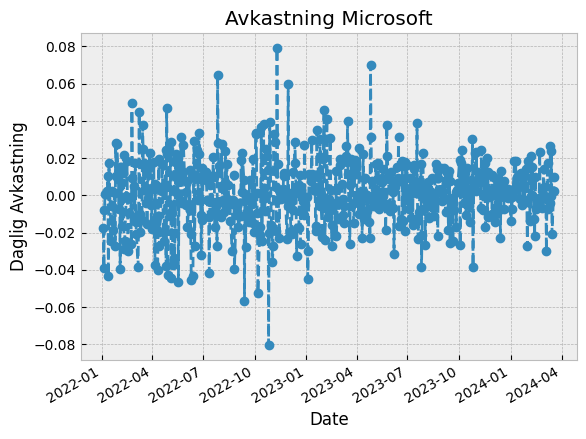

In [142]:
#Avkastningen daglig basis
ax = df['Log Ret'].plot(linestyle = '--', marker='o')
ax.set_title('Avkastning Microsoft')
ax.set_ylabel('Daglig Avkastning')


Text(0.5, 1.0, 'Distribusjon')

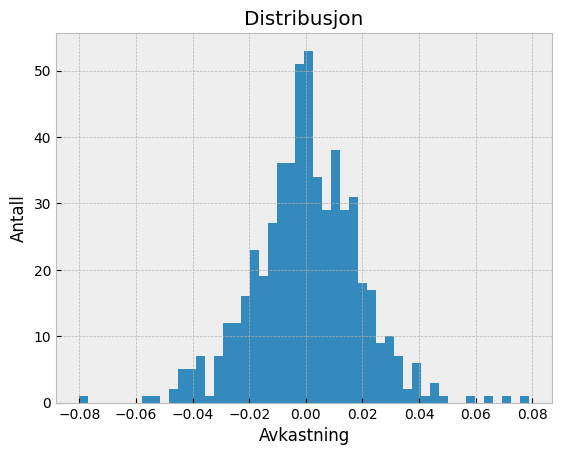

In [143]:
#Distribusjon avkastning
plt.hist(df['Log Ret'], bins= 50)
plt.xlabel('Avkastning')
plt.ylabel('Antall')
plt.title(f'Distribusjon')


#### Risiko

In [144]:
#Årlig risiko
msft_std = np.std(df['Log Ret'])*100
print(f'Årlig standard avvik for MSFT: {(msft_std * (250**0.5)).round(2)}%')

Årlig standard avvik for MSFT: 29.68%


In [145]:
#Henter S&P500 som en markeds proxy
market_std = np.std(market_proxy['Log Ret'])*100
print(f'Årlig standard avvik for markedet: {(market_std * (250**0.5)).round(2)}%')

Årlig standard avvik for markedet: 18.77%


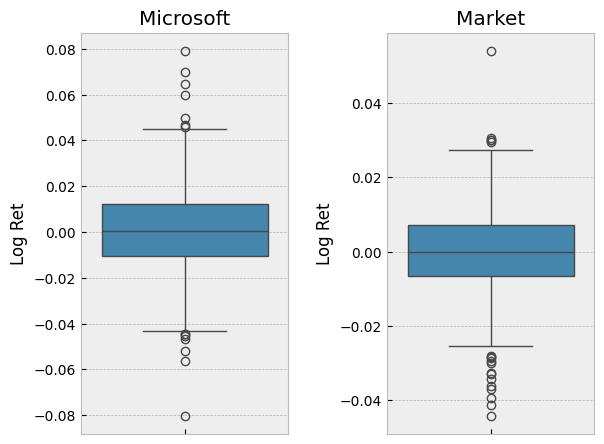

In [146]:
fig, axes = plt.subplots(1, 2)

#create boxplot in each subplot
sns.boxplot(df['Log Ret'], ax=axes[0]).set_title('Microsoft')
sns.boxplot(market_proxy['Log Ret'], ax=axes[1]).set_title('Market')

plt.tight_layout(pad=2)

#### Korrelasjon

In [147]:
#Korrelasjon med markedet
np.corrcoef(market_proxy['Log Ret'].dropna(), df['Log Ret'].dropna())[1,0]

0.8013626624573965

Text(0.5, 41.583333333333314, 'Market')

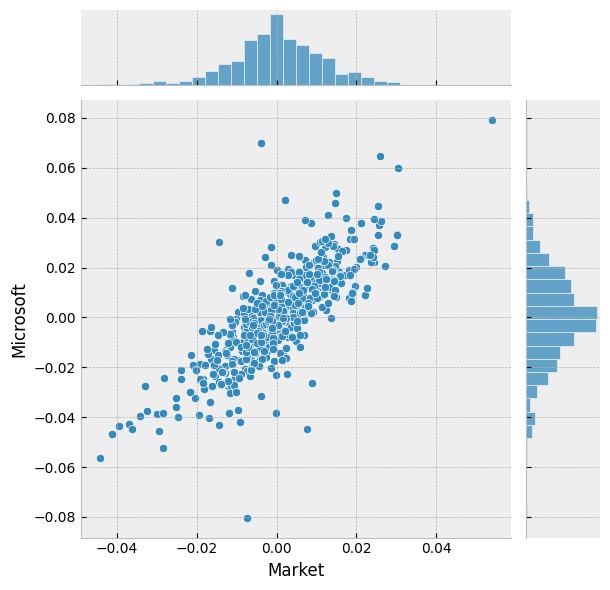

In [148]:
#Scatterplot
sns.jointplot(x = market_proxy['Log Ret'], y = df['Log Ret'])
plt.ylabel("Microsoft")
plt.xlabel("Market")

#### Prediksjon

In [149]:
df_pred = pd.DataFrame(df['Adj Close'])
dataset = df_pred.values

In [150]:
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

528

In [151]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [152]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.54592781, 0.5196169 , 0.46172389, 0.45026443, 0.45099797,
       0.45205189, 0.45530672, 0.47038735, 0.40864398, 0.43339633,
       0.39878859, 0.40190556, 0.39397607, 0.36844422, 0.37000264,
       0.33388258, 0.37156119, 0.38590829, 0.42450382, 0.43697169,
       0.42679577, 0.44833939, 0.39237156, 0.41386937, 0.39099625,
       0.40754353, 0.43802575, 0.39755114, 0.36390628, 0.36372289,
       0.3887962 , 0.38718855, 0.34690588, 0.33404456, 0.33308026,
       0.29886027, 0.36463568, 0.37712937, 0.38392773, 0.36628942,
       0.3903579 , 0.37074474, 0.34290967, 0.29261378, 0.27855838,
       0.33666275, 0.32329637, 0.29794178, 0.28126819, 0.33046178,
       0.36371718, 0.36752944, 0.3914602 , 0.38562657, 0.40813378,
       0.38714274, 0.40831745, 0.40638813, 0.43863285, 0.46026723])]
[0.4531476320734623]

[array([0.54592781, 0.5196169 , 0.46172389, 0.45026443, 0.45099797,
       0.45205189, 0.45530672, 0.47038735, 0.40864398, 0.43339633,
       0.39878859, 0.40190556, 0.393

In [153]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


468/468 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 0.0082


In [154]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


/tmp/ipykernel_1407/3238400329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


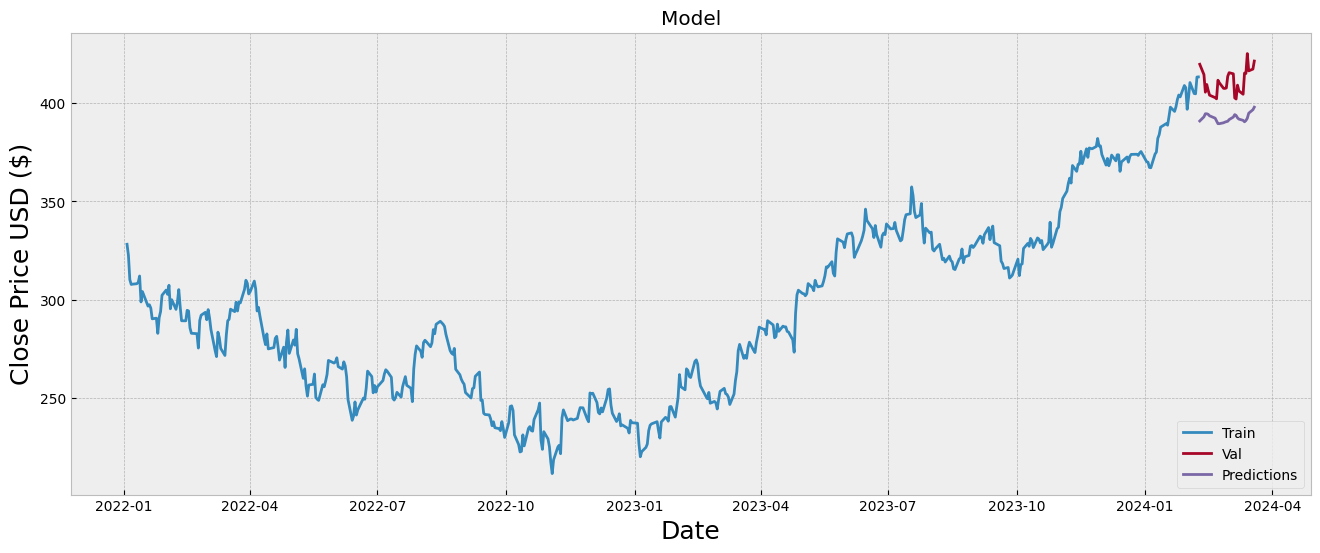

In [155]:
# Plot the data
train = df_pred[:training_data_len]
valid = df_pred[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [156]:
valid

,Adj Close,Predictions
Date,,
2024-02-09,419.773712,390.895050
2024-02-12,414.493500,393.026306
2024-02-13,405.570007,394.582062
2024-02-14,409.489990,394.574493
2024-02-15,406.559998,394.303040
2024-02-16,404.059998,393.539001
2024-02-20,402.790009,392.337616
2024-02-21,402.179993,390.932861
2024-02-22,411.649994,389.545502
